<CENTER>
    
# **PROYECTO DE ANÁLISIS DE DATOS**

## **Integrantes:**

* Valeria Franco

* Alid Rocha

## **Introducción**:
En el campo de la ingeniería civil, el control de calidad de los materiales es fundamental para garantizar la seguridad y durabilidad de las estructuras. Uno de los métodos más comunes para evaluar la resistencia del concreto es a través de pruebas de rotura de cilindros (Patiño, 2021).
Estas pruebas proporcionan datos cruciales sobre la resistencia del material en diferentes edades, permitiendo a los ingenieros tomar decisiones sobre el diseño y la construcción de obras. 

## **Objetivo**
Realizar un análisis exhaustivo de los datos de roturas de cilindros para diferentes obras y resistencias, mediante el lenguaje de programación Python y librerías para el análisis y visualización de datos como Matplotlib y Seaborn, para generar gráficos y funciones que permitan identificar patrones y tendencias en los resultados de las pruebas de resistencia del concreto.

### **1.Carga y Preprocesamiento de los Datos:**
-Cargar el conjunto de datos utilizando pandas o la librería más adecuada para el tipo de archivo que será importado.

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#Importar Data
filename= "Base de datos.xlsx"
data=pd.read_excel(filename)
data

,Obra,Num.Toma,Ruta,f'c,Fecha,Diametro,Rot 7-A (KN),Rot 7-B (KN),Rot 14-A (KN),Rot 14-B (KN),Rot 28-A (KN),Rot 28-B (KN),Peso 7-A (g),Peso 7-A (g).1,Peso 14-A (g),Peso 14-A (g).1,Peso 28-A (g),Peso 28-A (g).1
0,Vergeles,259,C:\Users\User\Documents\Controldecalidad\Vergeles,350,25/3/24,150,555.705,547.342115,691.20882,708.327446,795.20882,805.618446,13538.0,13529.0,13831.0,13579.0,13181,13332
1,Guasmo Sur,863,C:\Users\User\Documents\Controldecalidad\Guasm...,350,27/5/24,100,156.880,164.371640,230.88000,245.614640,347.88,351.93264,3930.0,3921.0,4045.0,4000.0,4066,3919
2,Trinipuerto,522,C:\Users\User\Documents\Controldecalidad\Trini...,280,21/5/24,150,286.200,287.058600,466.20000,467.598600,514.2,511.7306,12923.0,13697.0,13711.0,13825.0,13555,13247
3,Miraflores,199,C:\Users\User\Documents\Controldecalidad\Miraf...,140,1/2/24,100,135.680,147.120040,210.68000,208.303040,278.68,294.56104,4101.0,3909.0,3961.0,3944.0,3968,4091
4,Trinipuerto,168,C:\Users\User\Documents\Controldecalidad\Trini...,280,27/2/24,100,149.460,161.944380,207.46000,198.052380,247.46,235.16338,3964.0,3980.0,4009.0,4108.0,3991,3921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Mucho Lote,251,C:\Users\User\Documents\Controldecalidad\Mucho...,350,18/1/24,150,386.370,387.529110,528.12000,520.677360,653.12,669.12136,12914.0,13243.0,12985.0,12994.0,13440,13721
514,Miraflores,88,C:\Users\User\Documents\Controldecalidad\Miraf...,350,11/3/24,100,260.760,256.527280,NaN,NaN,432.76,437.06728,4010.0,3957.0,NaN,NaN,3926,4092
515,Vergeles,588,C:\Users\User\Documents\Controldecalidad\Vergeles,280,11/5/24,100,102.820,90.189460,NaN,NaN,220.82,231.51246,3943.0,4059.0,NaN,NaN,4024,4066
516,Trinipuerto,827,C:\Users\User\Documents\Controldecalidad\Trini...,210,4/4/24,150,300.510,301.411530,442.26000,446.595780,T,T,13769.0,13477.0,13464.0,13709.0,13736,13422


*La tabla tiene la siguiente descripción:*
- **Obra**: Ciudad o Locación donde se ubica la obra.
- **Num.Toma**: Código para nombrar a cada cilindro. 
- **f'c**: Resistencia a la compresión de diseño [Kg/cm²]
- **Fecha**: Fecha que se realizó la toma de muestras.
- **Diametro**: Diametro de cada uno de los cilindros [mm]
- **Rot 7**: Se refiere a la fuerza de compresión aplicada a los cilindros tomados a los 7 días [KN]. Se tomaron dos muestras A y B. 
- **Rot 14**: Se refiere a la fuerza de compresión aplicada a los cilindros tomados a los 14 días [KN]. Se tomaron dos muestras A y B. 
- **Rot 28**: Se refiere a la fuerza de compresión aplicada a los cilindros tomados a los 28 días [KN]. Se tomaron dos muestras A y B. 
- **Peso 7**: Se refiere al peso de los cilindros tomados a los 7 días [g]. Se tomaron dos muestras A y B. 
- **Peso 14**: Se refiere al peso de los cilindros tomados a los 14 días [g]. Se tomaron dos muestras A y B.  
- **Peso 28**: Se refiere al peso de los cilindros tomados a los 28 días [g]. Se tomaron dos muestras A y B.

##### Realizar limpieza inicial de datos: Corregir tipos de datos, modificar nombres de columnas, etc.

In [3]:
#Eliminación de columnas
z=data.drop(columns=["Num.Toma","Ruta"])


In [4]:
#Se revisa si hay datos nulos y de qué tipo son.
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Obra             518 non-null    object 
 1   f'c              518 non-null    int64  
 2   Fecha            518 non-null    object 
 3   Diametro         518 non-null    int64  
 4   Rot 7-A (KN)     517 non-null    float64
 5   Rot 7-B  (KN)    517 non-null    float64
 6   Rot 14-A (KN)    487 non-null    float64
 7   Rot 14-B  (KN)   487 non-null    float64
 8   Rot 28-A (KN)    518 non-null    object 
 9   Rot 28-B  (KN)   518 non-null    object 
 10  Peso 7-A (g)     517 non-null    float64
 11  Peso 7-A (g).1   517 non-null    float64
 12  Peso 14-A (g)    487 non-null    float64
 13  Peso 14-A (g).1  487 non-null    float64
 14  Peso 28-A (g)    518 non-null    int64  
 15  Peso 28-A (g).1  518 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory usage: 64.9+ KB


In [5]:
#Se observa que hay datos numericos como object.
z.dtypes

Obra                object
f'c                  int64
Fecha               object
Diametro             int64
Rot 7-A (KN)       float64
Rot 7-B  (KN)      float64
Rot 14-A (KN)      float64
Rot 14-B  (KN)     float64
Rot 28-A (KN)       object
Rot 28-B  (KN)      object
Peso 7-A (g)       float64
Peso 7-A (g).1     float64
Peso 14-A (g)      float64
Peso 14-A (g).1    float64
Peso 28-A (g)        int64
Peso 28-A (g).1      int64
dtype: object

*Como podemos observar, las columnas Roturas a los 28 días ("Rot 28") tiene un tipo de dato categórico debido a que en algunas celdas se encuentra la letra "T" que se refiere a los cilindros testigos que no se romperán.*

##### Reemplazar los valores "T" con "NaN", para que solo sean considerados como float

In [6]:
z['Rot 28-A (KN)'] = pd.to_numeric(z['Rot 28-A (KN)'], errors='coerce')
z

,Obra,f'c,Fecha,Diametro,Rot 7-A (KN),Rot 7-B (KN),Rot 14-A (KN),Rot 14-B (KN),Rot 28-A (KN),Rot 28-B (KN),Peso 7-A (g),Peso 7-A (g).1,Peso 14-A (g),Peso 14-A (g).1,Peso 28-A (g),Peso 28-A (g).1
0,Vergeles,350,25/3/24,150,555.705,547.342115,691.20882,708.327446,795.20882,805.618446,13538.0,13529.0,13831.0,13579.0,13181,13332
1,Guasmo Sur,350,27/5/24,100,156.880,164.371640,230.88000,245.614640,347.88000,351.93264,3930.0,3921.0,4045.0,4000.0,4066,3919
2,Trinipuerto,280,21/5/24,150,286.200,287.058600,466.20000,467.598600,514.20000,511.7306,12923.0,13697.0,13711.0,13825.0,13555,13247
3,Miraflores,140,1/2/24,100,135.680,147.120040,210.68000,208.303040,278.68000,294.56104,4101.0,3909.0,3961.0,3944.0,3968,4091
4,Trinipuerto,280,27/2/24,100,149.460,161.944380,207.46000,198.052380,247.46000,235.16338,3964.0,3980.0,4009.0,4108.0,3991,3921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Mucho Lote,350,18/1/24,150,386.370,387.529110,528.12000,520.677360,653.12000,669.12136,12914.0,13243.0,12985.0,12994.0,13440,13721
514,Miraflores,350,11/3/24,100,260.760,256.527280,NaN,NaN,432.76000,437.06728,4010.0,3957.0,NaN,NaN,3926,4092
515,Vergeles,280,11/5/24,100,102.820,90.189460,NaN,NaN,220.82000,231.51246,3943.0,4059.0,NaN,NaN,4024,4066
516,Trinipuerto,210,4/4/24,150,300.510,301.411530,442.26000,446.595780,NaN,T,13769.0,13477.0,13464.0,13709.0,13736,13422


In [7]:
z['Rot 28-B  (KN)'] = pd.to_numeric(z['Rot 28-B  (KN)'], errors='coerce')
z

,Obra,f'c,Fecha,Diametro,Rot 7-A (KN),Rot 7-B (KN),Rot 14-A (KN),Rot 14-B (KN),Rot 28-A (KN),Rot 28-B (KN),Peso 7-A (g),Peso 7-A (g).1,Peso 14-A (g),Peso 14-A (g).1,Peso 28-A (g),Peso 28-A (g).1
0,Vergeles,350,25/3/24,150,555.705,547.342115,691.20882,708.327446,795.20882,805.618446,13538.0,13529.0,13831.0,13579.0,13181,13332
1,Guasmo Sur,350,27/5/24,100,156.880,164.371640,230.88000,245.614640,347.88000,351.932640,3930.0,3921.0,4045.0,4000.0,4066,3919
2,Trinipuerto,280,21/5/24,150,286.200,287.058600,466.20000,467.598600,514.20000,511.730600,12923.0,13697.0,13711.0,13825.0,13555,13247
3,Miraflores,140,1/2/24,100,135.680,147.120040,210.68000,208.303040,278.68000,294.561040,4101.0,3909.0,3961.0,3944.0,3968,4091
4,Trinipuerto,280,27/2/24,100,149.460,161.944380,207.46000,198.052380,247.46000,235.163380,3964.0,3980.0,4009.0,4108.0,3991,3921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Mucho Lote,350,18/1/24,150,386.370,387.529110,528.12000,520.677360,653.12000,669.121360,12914.0,13243.0,12985.0,12994.0,13440,13721
514,Miraflores,350,11/3/24,100,260.760,256.527280,NaN,NaN,432.76000,437.067280,4010.0,3957.0,NaN,NaN,3926,4092
515,Vergeles,280,11/5/24,100,102.820,90.189460,NaN,NaN,220.82000,231.512460,3943.0,4059.0,NaN,NaN,4024,4066
516,Trinipuerto,210,4/4/24,150,300.510,301.411530,442.26000,446.595780,NaN,NaN,13769.0,13477.0,13464.0,13709.0,13736,13422


In [8]:
z.dtypes

Obra                object
f'c                  int64
Fecha               object
Diametro             int64
Rot 7-A (KN)       float64
Rot 7-B  (KN)      float64
Rot 14-A (KN)      float64
Rot 14-B  (KN)     float64
Rot 28-A (KN)      float64
Rot 28-B  (KN)     float64
Peso 7-A (g)       float64
Peso 7-A (g).1     float64
Peso 14-A (g)      float64
Peso 14-A (g).1    float64
Peso 28-A (g)        int64
Peso 28-A (g).1      int64
dtype: object

*Con el método **pd.to_numeric()** nos aseguramos que ahora todas las columnas numéricas contengan datos flotantes y pudo ser verificado con **pd.dtypes***

##### Reemplazar los valores "NaN" con el valor siguiente inmediato

In [9]:
x=z.fillna(method="ffill")
x

,Obra,f'c,Fecha,Diametro,Rot 7-A (KN),Rot 7-B (KN),Rot 14-A (KN),Rot 14-B (KN),Rot 28-A (KN),Rot 28-B (KN),Peso 7-A (g),Peso 7-A (g).1,Peso 14-A (g),Peso 14-A (g).1,Peso 28-A (g),Peso 28-A (g).1
0,Vergeles,350,25/3/24,150,555.705,547.342115,691.20882,708.327446,795.20882,805.618446,13538.0,13529.0,13831.0,13579.0,13181,13332
1,Guasmo Sur,350,27/5/24,100,156.880,164.371640,230.88000,245.614640,347.88000,351.932640,3930.0,3921.0,4045.0,4000.0,4066,3919
2,Trinipuerto,280,21/5/24,150,286.200,287.058600,466.20000,467.598600,514.20000,511.730600,12923.0,13697.0,13711.0,13825.0,13555,13247
3,Miraflores,140,1/2/24,100,135.680,147.120040,210.68000,208.303040,278.68000,294.561040,4101.0,3909.0,3961.0,3944.0,3968,4091
4,Trinipuerto,280,27/2/24,100,149.460,161.944380,207.46000,198.052380,247.46000,235.163380,3964.0,3980.0,4009.0,4108.0,3991,3921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Mucho Lote,350,18/1/24,150,386.370,387.529110,528.12000,520.677360,653.12000,669.121360,12914.0,13243.0,12985.0,12994.0,13440,13721
514,Miraflores,350,11/3/24,100,260.760,256.527280,528.12000,520.677360,432.76000,437.067280,4010.0,3957.0,12985.0,12994.0,3926,4092
515,Vergeles,280,11/5/24,100,102.820,90.189460,528.12000,520.677360,220.82000,231.512460,3943.0,4059.0,12985.0,12994.0,4024,4066
516,Trinipuerto,210,4/4/24,150,300.510,301.411530,442.26000,446.595780,220.82000,231.512460,13769.0,13477.0,13464.0,13709.0,13736,13422


In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Obra             518 non-null    object 
 1   f'c              518 non-null    int64  
 2   Fecha            518 non-null    object 
 3   Diametro         518 non-null    int64  
 4   Rot 7-A (KN)     518 non-null    float64
 5   Rot 7-B  (KN)    518 non-null    float64
 6   Rot 14-A (KN)    518 non-null    float64
 7   Rot 14-B  (KN)   518 non-null    float64
 8   Rot 28-A (KN)    518 non-null    float64
 9   Rot 28-B  (KN)   518 non-null    float64
 10  Peso 7-A (g)     518 non-null    float64
 11  Peso 7-A (g).1   518 non-null    float64
 12  Peso 14-A (g)    518 non-null    float64
 13  Peso 14-A (g).1  518 non-null    float64
 14  Peso 28-A (g)    518 non-null    int64  
 15  Peso 28-A (g).1  518 non-null    int64  
dtypes: float64(10), int64(4), object(2)
memory usage: 64.9+ KB


##### Convertir datos de flotantes a enteros en las columnas que indiquen los pesos de los cilindros, y de entero a categórico en las columnas que indiquen la resistencia de diseño y el diametro

In [11]:
columnas_a_numerico = ['Peso 7-A (g)', 'Peso 7-A (g).1','Peso 14-A (g)','Peso 14-A (g).1']
columnas_a_categorico = ["f'c", "Diametro"]
x[columnas_a_numerico] = x[columnas_a_numerico].astype(int)
x[columnas_a_categorico] = x[columnas_a_categorico].astype(object)
display(x)
x.info()

,Obra,f'c,Fecha,Diametro,Rot 7-A (KN),Rot 7-B (KN),Rot 14-A (KN),Rot 14-B (KN),Rot 28-A (KN),Rot 28-B (KN),Peso 7-A (g),Peso 7-A (g).1,Peso 14-A (g),Peso 14-A (g).1,Peso 28-A (g),Peso 28-A (g).1
0,Vergeles,350,25/3/24,150,555.705,547.342115,691.20882,708.327446,795.20882,805.618446,13538,13529,13831,13579,13181,13332
1,Guasmo Sur,350,27/5/24,100,156.880,164.371640,230.88000,245.614640,347.88000,351.932640,3930,3921,4045,4000,4066,3919
2,Trinipuerto,280,21/5/24,150,286.200,287.058600,466.20000,467.598600,514.20000,511.730600,12923,13697,13711,13825,13555,13247
3,Miraflores,140,1/2/24,100,135.680,147.120040,210.68000,208.303040,278.68000,294.561040,4101,3909,3961,3944,3968,4091
4,Trinipuerto,280,27/2/24,100,149.460,161.944380,207.46000,198.052380,247.46000,235.163380,3964,3980,4009,4108,3991,3921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Mucho Lote,350,18/1/24,150,386.370,387.529110,528.12000,520.677360,653.12000,669.121360,12914,13243,12985,12994,13440,13721
514,Miraflores,350,11/3/24,100,260.760,256.527280,528.12000,520.677360,432.76000,437.067280,4010,3957,12985,12994,3926,4092
515,Vergeles,280,11/5/24,100,102.820,90.189460,528.12000,520.677360,220.82000,231.512460,3943,4059,12985,12994,4024,4066
516,Trinipuerto,210,4/4/24,150,300.510,301.411530,442.26000,446.595780,220.82000,231.512460,13769,13477,13464,13709,13736,13422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Obra             518 non-null    object 
 1   f'c              518 non-null    object 
 2   Fecha            518 non-null    object 
 3   Diametro         518 non-null    object 
 4   Rot 7-A (KN)     518 non-null    float64
 5   Rot 7-B  (KN)    518 non-null    float64
 6   Rot 14-A (KN)    518 non-null    float64
 7   Rot 14-B  (KN)   518 non-null    float64
 8   Rot 28-A (KN)    518 non-null    float64
 9   Rot 28-B  (KN)   518 non-null    float64
 10  Peso 7-A (g)     518 non-null    int32  
 11  Peso 7-A (g).1   518 non-null    int32  
 12  Peso 14-A (g)    518 non-null    int32  
 13  Peso 14-A (g).1  518 non-null    int32  
 14  Peso 28-A (g)    518 non-null    int64  
 15  Peso 28-A (g).1  518 non-null    int64  
dtypes: float64(6), int32(4), int64(2), object(4)
memory usage: 56.

*Obtenenemos 518 filas y 16 columnas, de las cuales 4 son variables categóricas ("Obra","f'c","fecha","Diametro") y 12 son variables numéricas.*

##### Renombrar columnas

In [12]:
x.rename(columns={"f'c":"f'c (Kg/cm²)"},inplace=True)
x.rename(columns={"Diametro":"Diametro (mm)"},inplace=True)
x.rename(columns={"Peso 7-A (g).1":"Peso 7-B (g)"},inplace=True)
x.rename(columns={"Peso 14-A (g).1":"Peso 14-B (g)"},inplace=True)
x.rename(columns={"Peso 28-A (g).1":"Peso 28-B (g)"},inplace=True)
x

,Obra,f'c (Kg/cm²),Fecha,Diametro (mm),Rot 7-A (KN),Rot 7-B (KN),Rot 14-A (KN),Rot 14-B (KN),Rot 28-A (KN),Rot 28-B (KN),Peso 7-A (g),Peso 7-B (g),Peso 14-A (g),Peso 14-B (g),Peso 28-A (g),Peso 28-B (g)
0,Vergeles,350,25/3/24,150,555.705,547.342115,691.20882,708.327446,795.20882,805.618446,13538,13529,13831,13579,13181,13332
1,Guasmo Sur,350,27/5/24,100,156.880,164.371640,230.88000,245.614640,347.88000,351.932640,3930,3921,4045,4000,4066,3919
2,Trinipuerto,280,21/5/24,150,286.200,287.058600,466.20000,467.598600,514.20000,511.730600,12923,13697,13711,13825,13555,13247
3,Miraflores,140,1/2/24,100,135.680,147.120040,210.68000,208.303040,278.68000,294.561040,4101,3909,3961,3944,3968,4091
4,Trinipuerto,280,27/2/24,100,149.460,161.944380,207.46000,198.052380,247.46000,235.163380,3964,3980,4009,4108,3991,3921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Mucho Lote,350,18/1/24,150,386.370,387.529110,528.12000,520.677360,653.12000,669.121360,12914,13243,12985,12994,13440,13721
514,Miraflores,350,11/3/24,100,260.760,256.527280,528.12000,520.677360,432.76000,437.067280,4010,3957,12985,12994,3926,4092
515,Vergeles,280,11/5/24,100,102.820,90.189460,528.12000,520.677360,220.82000,231.512460,3943,4059,12985,12994,4024,4066
516,Trinipuerto,210,4/4/24,150,300.510,301.411530,442.26000,446.595780,220.82000,231.512460,13769,13477,13464,13709,13736,13422


##### Eliminar duplicados

In [13]:
y = x.drop_duplicates(subset=['Obra', "f'c (Kg/cm²)","Fecha","Diametro (mm)"], ignore_index = True)
y

,Obra,f'c (Kg/cm²),Fecha,Diametro (mm),Rot 7-A (KN),Rot 7-B (KN),Rot 14-A (KN),Rot 14-B (KN),Rot 28-A (KN),Rot 28-B (KN),Peso 7-A (g),Peso 7-B (g),Peso 14-A (g),Peso 14-B (g),Peso 28-A (g),Peso 28-B (g)
0,Vergeles,350,25/3/24,150,555.705,547.342115,691.20882,708.327446,795.20882,805.618446,13538,13529,13831,13579,13181,13332
1,Guasmo Sur,350,27/5/24,100,156.880,164.371640,230.88000,245.614640,347.88000,351.932640,3930,3921,4045,4000,4066,3919
2,Trinipuerto,280,21/5/24,150,286.200,287.058600,466.20000,467.598600,514.20000,511.730600,12923,13697,13711,13825,13555,13247
3,Miraflores,140,1/2/24,100,135.680,147.120040,210.68000,208.303040,278.68000,294.561040,4101,3909,3961,3944,3968,4091
4,Trinipuerto,280,27/2/24,100,149.460,161.944380,207.46000,198.052380,247.46000,235.163380,3964,3980,4009,4108,3991,3921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,Mucho Lote,350,18/1/24,150,386.370,387.529110,528.12000,520.677360,653.12000,669.121360,12914,13243,12985,12994,13440,13721
505,Miraflores,350,11/3/24,100,260.760,256.527280,528.12000,520.677360,432.76000,437.067280,4010,3957,12985,12994,3926,4092
506,Vergeles,280,11/5/24,100,102.820,90.189460,528.12000,520.677360,220.82000,231.512460,3943,4059,12985,12994,4024,4066
507,Trinipuerto,210,4/4/24,150,300.510,301.411530,442.26000,446.595780,220.82000,231.512460,13769,13477,13464,13709,13736,13422


In [14]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Obra            509 non-null    object 
 1   f'c (Kg/cm²)    509 non-null    object 
 2   Fecha           509 non-null    object 
 3   Diametro (mm)   509 non-null    object 
 4   Rot 7-A (KN)    509 non-null    float64
 5   Rot 7-B  (KN)   509 non-null    float64
 6   Rot 14-A (KN)   509 non-null    float64
 7   Rot 14-B  (KN)  509 non-null    float64
 8   Rot 28-A (KN)   509 non-null    float64
 9   Rot 28-B  (KN)  509 non-null    float64
 10  Peso 7-A (g)    509 non-null    int32  
 11  Peso 7-B (g)    509 non-null    int32  
 12  Peso 14-A (g)   509 non-null    int32  
 13  Peso 14-B (g)   509 non-null    int32  
 14  Peso 28-A (g)   509 non-null    int64  
 15  Peso 28-B (g)   509 non-null    int64  
dtypes: float64(6), int32(4), int64(2), object(4)
memory usage: 55.8+ KB


*Finalmenete, obtenenemos 509 filas y 16 columnas*

### 2.Análisis Exploratorio de Datos (EDA):

##### Realizar un análisis exploratorio de los datos, como describir estadísticas

In [15]:
# variables numericas
y.describe()

,Rot 7-A (KN),Rot 7-B (KN),Rot 14-A (KN),Rot 14-B (KN),Rot 28-A (KN),Rot 28-B (KN),Peso 7-A (g),Peso 7-B (g),Peso 14-A (g),Peso 14-B (g),Peso 28-A (g),Peso 28-B (g)
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,197.148546,197.799304,313.513848,315.049490,369.282915,370.132624,8807.821218,8806.359528,9012.779961,9020.577603,8826.306483,8814.341847
std,106.163823,106.248236,141.859753,143.245132,147.834663,148.535731,4690.144588,4689.053497,4684.971535,4689.353966,4691.915034,4681.182322
min,42.400000,29.488200,98.520000,104.713200,159.400000,157.711720,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3901.000000
25%,112.360000,114.703080,184.300000,186.297220,239.120000,239.436160,4005.000000,4002.000000,4015.000000,4013.000000,4005.000000,4005.000000
50%,167.480000,169.532075,302.625000,308.427515,358.800000,355.688875,12932.000000,12933.000000,12974.000000,13002.000000,12925.000000,12932.000000
75%,259.965000,258.663670,421.425000,423.767500,469.965000,474.749990,13374.000000,13366.000000,13418.000000,13390.000000,13364.000000,13362.000000
max,560.475000,574.192425,740.475000,752.340270,844.090000,841.607270,13846.000000,13833.000000,13846.000000,13850.000000,13848.000000,13848.000000


##### Calcular el promedio de Rotura y Peso a los 7 días, 14 días, y 28 días

In [16]:
def agregar_columnas_promedio(df):
    for i in range(4, df.shape[1], 2):
        if i + 1 < df.shape[1]:
            col_name = f'prom_col{i}_{i+1}'
            df[col_name] = df.iloc[:, i:i+2].mean(axis=1)
    return df

In [17]:
dfmean = agregar_columnas_promedio(y)
dfmean

,Obra,f'c (Kg/cm²),Fecha,Diametro (mm),Rot 7-A (KN),Rot 7-B (KN),Rot 14-A (KN),Rot 14-B (KN),Rot 28-A (KN),Rot 28-B (KN),...,Peso 14-A (g),Peso 14-B (g),Peso 28-A (g),Peso 28-B (g),prom_col4_5,prom_col6_7,prom_col8_9,prom_col10_11,prom_col12_13,prom_col14_15
0,Vergeles,350,25/3/24,150,555.705,547.342115,691.20882,708.327446,795.20882,805.618446,...,13831,13579,13181,13332,551.523558,699.768133,800.413633,13533.5,13705.0,13256.5
1,Guasmo Sur,350,27/5/24,100,156.880,164.371640,230.88000,245.614640,347.88000,351.932640,...,4045,4000,4066,3919,160.625820,238.247320,349.906320,3925.5,4022.5,3992.5
2,Trinipuerto,280,21/5/24,150,286.200,287.058600,466.20000,467.598600,514.20000,511.730600,...,13711,13825,13555,13247,286.629300,466.899300,512.965300,13310.0,13768.0,13401.0
3,Miraflores,140,1/2/24,100,135.680,147.120040,210.68000,208.303040,278.68000,294.561040,...,3961,3944,3968,4091,141.400020,209.491520,286.620520,4005.0,3952.5,4029.5
4,Trinipuerto,280,27/2/24,100,149.460,161.944380,207.46000,198.052380,247.46000,235.163380,...,4009,4108,3991,3921,155.702190,202.756190,241.311690,3972.0,4058.5,3956.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,Mucho Lote,350,18/1/24,150,386.370,387.529110,528.12000,520.677360,653.12000,669.121360,...,12985,12994,13440,13721,386.949555,524.398680,661.120680,13078.5,12989.5,13580.5
505,Miraflores,350,11/3/24,100,260.760,256.527280,528.12000,520.677360,432.76000,437.067280,...,12985,12994,3926,4092,258.643640,524.398680,434.913640,3983.5,12989.5,4009.0
506,Vergeles,280,11/5/24,100,102.820,90.189460,528.12000,520.677360,220.82000,231.512460,...,12985,12994,4024,4066,96.504730,524.398680,226.166230,4001.0,12989.5,4045.0
507,Trinipuerto,210,4/4/24,150,300.510,301.411530,442.26000,446.595780,220.82000,231.512460,...,13464,13709,13736,13422,300.960765,444.427890,226.166230,13623.0,13586.5,13579.0


##### Renombrar columnas 

In [18]:
dfmean.rename(columns={"prom_col4_5":"Prom Rot 7d (KN)"},inplace=True)
dfmean.rename(columns={"prom_col6_7":"Prom Rot 14d (KN)"},inplace=True)
dfmean.rename(columns={"prom_col8_9":"Prom Rot 28d (KN)"},inplace=True)
dfmean.rename(columns={"prom_col10_11":"Prom Peso 7d (g)"},inplace=True)
dfmean.rename(columns={"prom_col12_13":"Prom Peso 14d (g)"},inplace=True)
dfmean.rename(columns={"prom_col14_15":"Prom Peso 28d (g)"},inplace=True)
dfmean

,Obra,f'c (Kg/cm²),Fecha,Diametro (mm),Rot 7-A (KN),Rot 7-B (KN),Rot 14-A (KN),Rot 14-B (KN),Rot 28-A (KN),Rot 28-B (KN),...,Peso 14-A (g),Peso 14-B (g),Peso 28-A (g),Peso 28-B (g),Prom Rot 7d (KN),Prom Rot 14d (KN),Prom Rot 28d (KN),Prom Peso 7d (g),Prom Peso 14d (g),Prom Peso 28d (g)
0,Vergeles,350,25/3/24,150,555.705,547.342115,691.20882,708.327446,795.20882,805.618446,...,13831,13579,13181,13332,551.523558,699.768133,800.413633,13533.5,13705.0,13256.5
1,Guasmo Sur,350,27/5/24,100,156.880,164.371640,230.88000,245.614640,347.88000,351.932640,...,4045,4000,4066,3919,160.625820,238.247320,349.906320,3925.5,4022.5,3992.5
2,Trinipuerto,280,21/5/24,150,286.200,287.058600,466.20000,467.598600,514.20000,511.730600,...,13711,13825,13555,13247,286.629300,466.899300,512.965300,13310.0,13768.0,13401.0
3,Miraflores,140,1/2/24,100,135.680,147.120040,210.68000,208.303040,278.68000,294.561040,...,3961,3944,3968,4091,141.400020,209.491520,286.620520,4005.0,3952.5,4029.5
4,Trinipuerto,280,27/2/24,100,149.460,161.944380,207.46000,198.052380,247.46000,235.163380,...,4009,4108,3991,3921,155.702190,202.756190,241.311690,3972.0,4058.5,3956.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,Mucho Lote,350,18/1/24,150,386.370,387.529110,528.12000,520.677360,653.12000,669.121360,...,12985,12994,13440,13721,386.949555,524.398680,661.120680,13078.5,12989.5,13580.5
505,Miraflores,350,11/3/24,100,260.760,256.527280,528.12000,520.677360,432.76000,437.067280,...,12985,12994,3926,4092,258.643640,524.398680,434.913640,3983.5,12989.5,4009.0
506,Vergeles,280,11/5/24,100,102.820,90.189460,528.12000,520.677360,220.82000,231.512460,...,12985,12994,4024,4066,96.504730,524.398680,226.166230,4001.0,12989.5,4045.0
507,Trinipuerto,210,4/4/24,150,300.510,301.411530,442.26000,446.595780,220.82000,231.512460,...,13464,13709,13736,13422,300.960765,444.427890,226.166230,13623.0,13586.5,13579.0


In [19]:
dfmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Obra               509 non-null    object 
 1   f'c (Kg/cm²)       509 non-null    object 
 2   Fecha              509 non-null    object 
 3   Diametro (mm)      509 non-null    object 
 4   Rot 7-A (KN)       509 non-null    float64
 5   Rot 7-B  (KN)      509 non-null    float64
 6   Rot 14-A (KN)      509 non-null    float64
 7   Rot 14-B  (KN)     509 non-null    float64
 8   Rot 28-A (KN)      509 non-null    float64
 9   Rot 28-B  (KN)     509 non-null    float64
 10  Peso 7-A (g)       509 non-null    int32  
 11  Peso 7-B (g)       509 non-null    int32  
 12  Peso 14-A (g)      509 non-null    int32  
 13  Peso 14-B (g)      509 non-null    int32  
 14  Peso 28-A (g)      509 non-null    int64  
 15  Peso 28-B (g)      509 non-null    int64  
 16  Prom Rot 7d (KN)   509 non

*Con la aplicación de la funcion agregar_columnas_promedio(df), se generó un dataframe con  509 filas y 22 columnas, por eso se procede a eliminar columnas que no son útiles para el análisis de datos.*

In [20]:
columnas_a_eliminar = ['Rot 7-A (KN)','Rot 7-B  (KN)','Rot 14-A (KN)', 'Rot 14-B  (KN)','Rot 28-A (KN)','Rot 28-B  (KN)','Peso 7-A (g)','Peso 7-B (g)','Peso 14-A (g)','Peso 14-B (g)','Peso 28-A (g)','Peso 28-B (g)']
df_modificado = dfmean.drop(columns=columnas_a_eliminar)
df_modificado

,Obra,f'c (Kg/cm²),Fecha,Diametro (mm),Prom Rot 7d (KN),Prom Rot 14d (KN),Prom Rot 28d (KN),Prom Peso 7d (g),Prom Peso 14d (g),Prom Peso 28d (g)
0,Vergeles,350,25/3/24,150,551.523558,699.768133,800.413633,13533.5,13705.0,13256.5
1,Guasmo Sur,350,27/5/24,100,160.625820,238.247320,349.906320,3925.5,4022.5,3992.5
2,Trinipuerto,280,21/5/24,150,286.629300,466.899300,512.965300,13310.0,13768.0,13401.0
3,Miraflores,140,1/2/24,100,141.400020,209.491520,286.620520,4005.0,3952.5,4029.5
4,Trinipuerto,280,27/2/24,100,155.702190,202.756190,241.311690,3972.0,4058.5,3956.0
...,...,...,...,...,...,...,...,...,...,...
504,Mucho Lote,350,18/1/24,150,386.949555,524.398680,661.120680,13078.5,12989.5,13580.5
505,Miraflores,350,11/3/24,100,258.643640,524.398680,434.913640,3983.5,12989.5,4009.0
506,Vergeles,280,11/5/24,100,96.504730,524.398680,226.166230,4001.0,12989.5,4045.0
507,Trinipuerto,210,4/4/24,150,300.960765,444.427890,226.166230,13623.0,13586.5,13579.0


##### Calcular la resistencia a la compresión real de cada proyecto.

In [21]:
def calcular_resistencia(df):
    for i in range(4, 7, 1):
        if i < 7:
            col_name = f'prom_col{i}'
            df[col_name] = ((df.iloc[:, i]*1000) / ((math.pi*(df.iloc[:, 3]**2))/4)) * 10.197
    return df

In [22]:
f = calcular_resistencia(df_modificado)
f

,Obra,f'c (Kg/cm²),Fecha,Diametro (mm),Prom Rot 7d (KN),Prom Rot 14d (KN),Prom Rot 28d (KN),Prom Peso 7d (g),Prom Peso 14d (g),Prom Peso 28d (g),prom_col4,prom_col5,prom_col6
0,Vergeles,350,25/3/24,150,551.523558,699.768133,800.413633,13533.5,13705.0,13256.5,318.246831,403.788719,461.864409
1,Guasmo Sur,350,27/5/24,100,160.625820,238.247320,349.906320,3925.5,4022.5,3992.5,208.544094,309.321824,454.2912
2,Trinipuerto,280,21/5/24,150,286.629300,466.899300,512.965300,13310.0,13768.0,13401.0,165.394325,269.415912,295.997476
3,Miraflores,140,1/2/24,100,141.400020,209.491520,286.620520,4005.0,3952.5,4029.5,183.582808,271.987525,372.125831
4,Trinipuerto,280,27/2/24,100,155.702190,202.756190,241.311690,3972.0,4058.5,3956.0,202.151635,263.242896,313.300364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,Mucho Lote,350,18/1/24,150,386.949555,524.398680,661.120680,13078.5,12989.5,13580.5,223.282338,302.594904,381.487895
505,Miraflores,350,11/3/24,100,258.643640,524.398680,434.913640,3983.5,12989.5,4009.0,335.802822,680.838534,564.658105
506,Vergeles,280,11/5/24,100,96.504730,524.398680,226.166230,4001.0,12989.5,4045.0,125.294249,680.838534,293.636674
507,Trinipuerto,210,4/4/24,150,300.960765,444.427890,226.166230,13623.0,13586.5,13579.0,173.664041,256.449186,130.505189


In [23]:
columnas_a_eliminar_prom = ['Prom Rot 7d (KN)','Prom Rot 14d (KN)','Prom Rot 28d (KN)']
f_f = f.drop(columns=columnas_a_eliminar_prom)
f_f

,Obra,f'c (Kg/cm²),Fecha,Diametro (mm),Prom Peso 7d (g),Prom Peso 14d (g),Prom Peso 28d (g),prom_col4,prom_col5,prom_col6
0,Vergeles,350,25/3/24,150,13533.5,13705.0,13256.5,318.246831,403.788719,461.864409
1,Guasmo Sur,350,27/5/24,100,3925.5,4022.5,3992.5,208.544094,309.321824,454.2912
2,Trinipuerto,280,21/5/24,150,13310.0,13768.0,13401.0,165.394325,269.415912,295.997476
3,Miraflores,140,1/2/24,100,4005.0,3952.5,4029.5,183.582808,271.987525,372.125831
4,Trinipuerto,280,27/2/24,100,3972.0,4058.5,3956.0,202.151635,263.242896,313.300364
...,...,...,...,...,...,...,...,...,...,...
504,Mucho Lote,350,18/1/24,150,13078.5,12989.5,13580.5,223.282338,302.594904,381.487895
505,Miraflores,350,11/3/24,100,3983.5,12989.5,4009.0,335.802822,680.838534,564.658105
506,Vergeles,280,11/5/24,100,4001.0,12989.5,4045.0,125.294249,680.838534,293.636674
507,Trinipuerto,210,4/4/24,150,13623.0,13586.5,13579.0,173.664041,256.449186,130.505189


In [24]:
f_f.rename(columns={"prom_col4":"Prom f'c 7d (Kg/cm²)"},inplace=True)
f_f.rename(columns={"prom_col5":"Prom f'c 14d (Kg/cm²)"},inplace=True)
f_f.rename(columns={"prom_col6":"Prom f'c 28d (Kg/cm²)"},inplace=True)
f_f

,Obra,f'c (Kg/cm²),Fecha,Diametro (mm),Prom Peso 7d (g),Prom Peso 14d (g),Prom Peso 28d (g),Prom f'c 7d (Kg/cm²),Prom f'c 14d (Kg/cm²),Prom f'c 28d (Kg/cm²)
0,Vergeles,350,25/3/24,150,13533.5,13705.0,13256.5,318.246831,403.788719,461.864409
1,Guasmo Sur,350,27/5/24,100,3925.5,4022.5,3992.5,208.544094,309.321824,454.2912
2,Trinipuerto,280,21/5/24,150,13310.0,13768.0,13401.0,165.394325,269.415912,295.997476
3,Miraflores,140,1/2/24,100,4005.0,3952.5,4029.5,183.582808,271.987525,372.125831
4,Trinipuerto,280,27/2/24,100,3972.0,4058.5,3956.0,202.151635,263.242896,313.300364
...,...,...,...,...,...,...,...,...,...,...
504,Mucho Lote,350,18/1/24,150,13078.5,12989.5,13580.5,223.282338,302.594904,381.487895
505,Miraflores,350,11/3/24,100,3983.5,12989.5,4009.0,335.802822,680.838534,564.658105
506,Vergeles,280,11/5/24,100,4001.0,12989.5,4045.0,125.294249,680.838534,293.636674
507,Trinipuerto,210,4/4/24,150,13623.0,13586.5,13579.0,173.664041,256.449186,130.505189


##### Agregar una columna en la que se evalúe la resistencia a la compresión real del proyecto vs la resistencia de diseño

In [25]:
# Inicializar una lista para almacenar los resultados de las verificaciones
verificaciones = []

# Bucle para verificar las condiciones fila por fila y crear la nueva columna
for i in range(len(f_f)):
    valor_col1 = f_f.loc[i, "f'c (Kg/cm²)"]
    valor_col2 = f_f.loc[i, "Prom f'c 7d (Kg/cm²)"]
    valor_col3 = f_f.loc[i, "Prom f'c 14d (Kg/cm²)"]
    valor_col4 = f_f.loc[i, "Prom f'c 28d (Kg/cm²)"]
    
    # Verificar si el valor de la columna 4 no es nulo
    if not pd.isnull(valor_col4):
        if valor_col1 <= valor_col4:
            verificaciones.append('Cumple')
        else:
            verificaciones.append('No cumple')
    # Verificar si el valor de la columna 3 no es nulo
    elif not pd.isnull(valor_col3):
        if valor_col1 <= valor_col3:
            verificaciones.append('Cumple')
        else:
            verificaciones.append('No cumple')
    else:
        if valor_col1 <= valor_col2:
            verificaciones.append('Cumple')
        else:
            verificaciones.append('No cumple')

# Añadir la nueva columna al DataFrame
f_f['Evaluación'] = verificaciones

# Mostrar el DataFrame actualizado
f_f

,Obra,f'c (Kg/cm²),Fecha,Diametro (mm),Prom Peso 7d (g),Prom Peso 14d (g),Prom Peso 28d (g),Prom f'c 7d (Kg/cm²),Prom f'c 14d (Kg/cm²),Prom f'c 28d (Kg/cm²),Evaluación
0,Vergeles,350,25/3/24,150,13533.5,13705.0,13256.5,318.246831,403.788719,461.864409,Cumple
1,Guasmo Sur,350,27/5/24,100,3925.5,4022.5,3992.5,208.544094,309.321824,454.2912,Cumple
2,Trinipuerto,280,21/5/24,150,13310.0,13768.0,13401.0,165.394325,269.415912,295.997476,Cumple
3,Miraflores,140,1/2/24,100,4005.0,3952.5,4029.5,183.582808,271.987525,372.125831,Cumple
4,Trinipuerto,280,27/2/24,100,3972.0,4058.5,3956.0,202.151635,263.242896,313.300364,Cumple
...,...,...,...,...,...,...,...,...,...,...,...
504,Mucho Lote,350,18/1/24,150,13078.5,12989.5,13580.5,223.282338,302.594904,381.487895,Cumple
505,Miraflores,350,11/3/24,100,3983.5,12989.5,4009.0,335.802822,680.838534,564.658105,Cumple
506,Vergeles,280,11/5/24,100,4001.0,12989.5,4045.0,125.294249,680.838534,293.636674,Cumple
507,Trinipuerto,210,4/4/24,150,13623.0,13586.5,13579.0,173.664041,256.449186,130.505189,No cumple


### 3.Visualización de Datos.

#### Función para crear un gráfico de pastel sobre el cumplimiento de Resistencia a la compresión por obra

In [33]:
def grafpastel_obra(df, obra):
    # Filtrar los datos por la obra
    df_obra = df[df['Obra'] == obra]
    
    # Contar el número de cilindros que cumplen y no cumplen
    c = df_obra['Evaluación'].value_counts()
    
    # Crear el gráfico de pastel
    plt.figure(figsize=(8, 6))
    plt.pie(c, labels=c.index, autopct='%1.1f%%', startangle=140, colors=['pink','g'])
    plt.title(f'Cumplimiento de Resistencia a la compresión para {obra}')
    plt.axis('equal')  # Asegura que el gráfico de pastel sea circular
    plt.show()

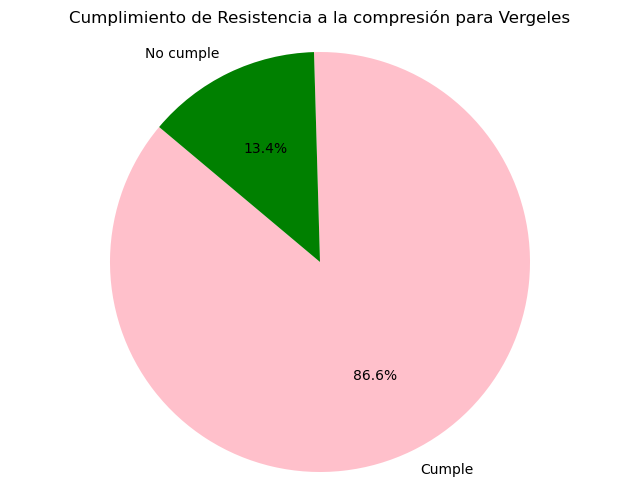

In [34]:
grafpastel_obra(f_f, 'Vergeles')

#### Función para crear un gráfico de barras de Resistencia de diseño vs Resistencia real de una determinada obra

Ingrese el nombre de la obra:  Vergeles


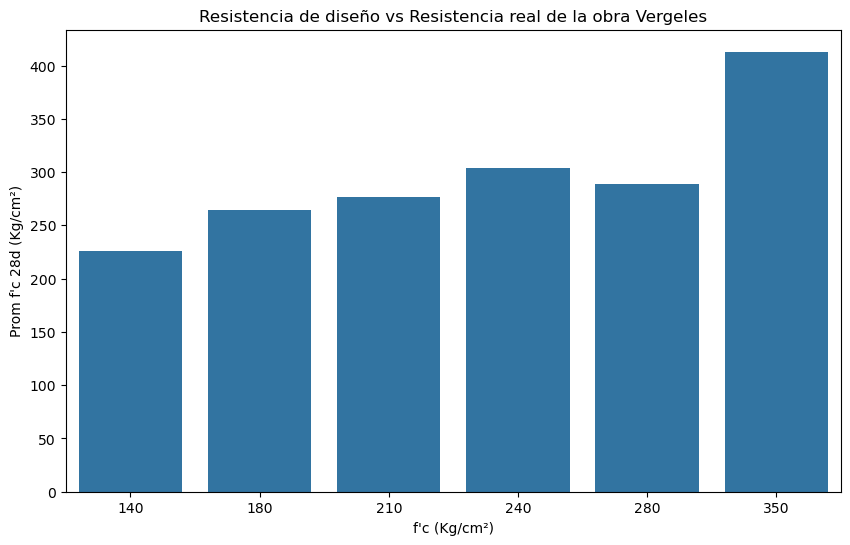

In [26]:
def Resistencia_DiseñovsReal(df, obra):
    # Agrupar los datos y calcular la media de la resistencia de diseño a los 28 días
    df_modificado2 = df.groupby(["Obra", "f'c (Kg/cm²)"])[["Prom f'c 28d (Kg/cm²)"]].mean().reset_index()
    
    # Filtrar los datos por la obra especificada
    g = df_modificado2.loc[df_modificado2["Obra"] == obra, ["Obra", "f'c (Kg/cm²)", "Prom f'c 28d (Kg/cm²)"]]
    
    # Crear la figura y los ejes para el gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Crear el gráfico de barras con seaborn
    sns.barplot(data=g, x="f'c (Kg/cm²)", y="Prom f'c 28d (Kg/cm²)")
    
    # Configurar las etiquetas y el título
    ax.set_title(f"Resistencia de diseño vs Resistencia real de la obra {obra}")
    
    # Mostrar el gráfico
    plt.show()

# Solicitar el nombre de la obra al usuario
nombre_obra = input("Ingrese el nombre de la obra: ")
Resistencia_DiseñovsReal(f_f, nombre_obra)

#### Función para crear un gráfico de dispersión de la Relación entre el diametro de los cilindros y resistencias a la compresión.

In [27]:
def Scatter_diametro_resistencias(df, diametro_columna, resistencia_columnas, edades):
    plt.figure(figsize=(10, 6))
    for i, edad in enumerate(edades):
    #i: Es el índice del elemento en edades.
    #edad: Es el valor correspondiente en edades.
        plt.scatter(df[diametro_columna], df[resistencia_columnas[i]], label=f'Resistencia a la compresión a los {edad} días')

    # Configuración del gráfico
    plt.title('Relación entre Diámetro de los cilindros y Resistencias a la compresión')
    plt.xlabel('Diámetro (mm)')
    plt.ylabel('Resistencia a la compresión (Kg/cm²)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

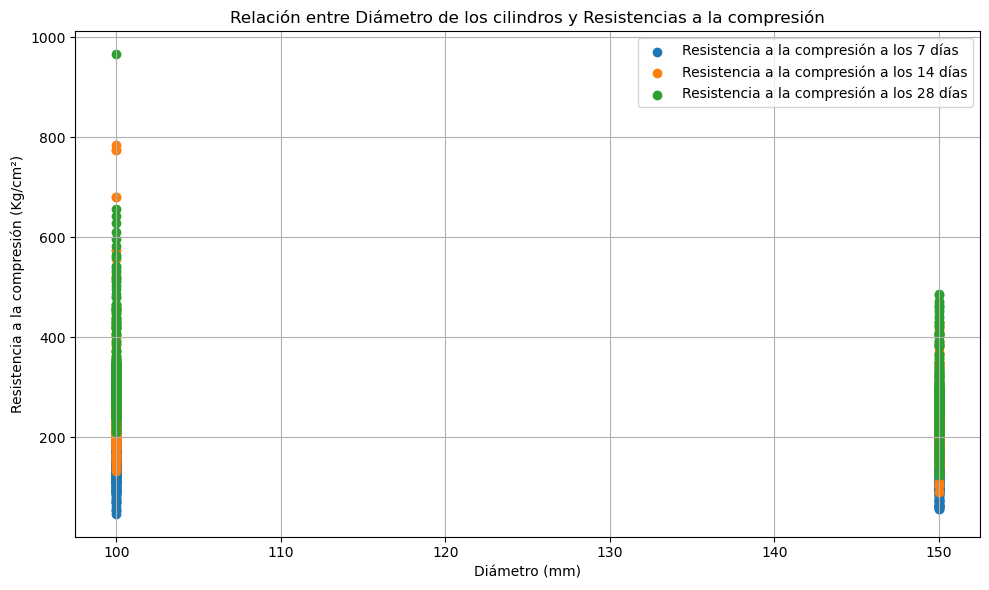

In [28]:
resistencia_columnas = ["Prom f'c 7d (Kg/cm²)", "Prom f'c 14d (Kg/cm²)", "Prom f'c 28d (Kg/cm²)"]
edades = ['7', '14', '28']
Scatter_diametro_resistencias(f_f, 'Diametro (mm)', resistencia_columnas, edades)

#### Función para crear un gráfico de caja y bigote para resistencia a la compresión de cada obra.

In [29]:
def Caja_obra(df, obra, x_variable, y_variable):
    df_filtrado = df[df["Obra"] == obra]
    sns.boxplot(x=x_variable, y=y_variable, data=df_filtrado, palette='Set2')
    plt.title(f'Caja y bigotes para resistencia a la compresión de la obra {obra} (R. real vs R. diseño)')
    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

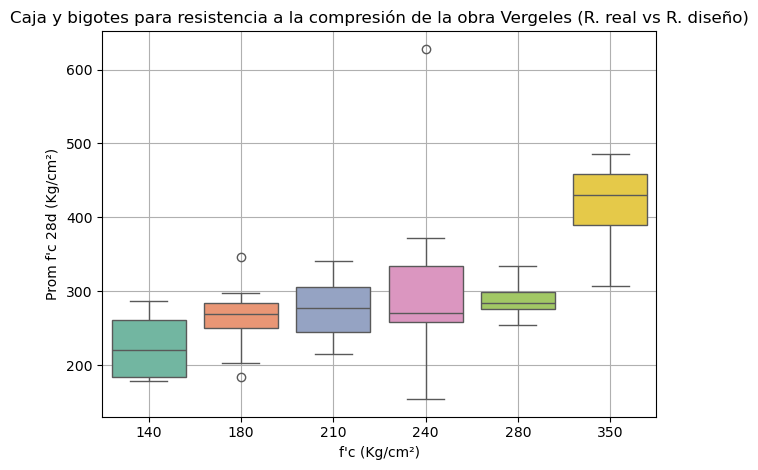

In [30]:
Caja_obra(f_f, 'Vergeles', "f'c (Kg/cm²)", "Prom f'c 28d (Kg/cm²)")

#### Función para crear un gráfico de líneas para promedio de resistencias a la compresión a diferentes edades de rotura

In [31]:
def plot_lineas_por_obra(df, obra_name):
    obra_data = df[df['Obra'] == obra_name]
    
    # Configuración del tamaño del gráfico
    plt.figure(figsize=(12, 8))
    
    # Definir los días y las columnas de interés
    dias = ['7 días', '14 días', '28 días']
    columnas_roturas = ["Prom f'c 7d (Kg/cm²)", "Prom f'c 14d (Kg/cm²)", "Prom f'c 28d (Kg/cm²)"]
    
    # Obtener los colores para cada línea
    colors = sns.color_palette('Set2', n_colors=len(obra_data["f'c (Kg/cm²)"].unique()))
    
    # Iterar sobre cada resistencia de diseño y calcular los promedios de roturas
    # Dentro del bucle for, se utiliza group[columnas_roturas].mean() para calcular los promedios de las roturas ('Prom Rot 7d (KN)', 'Prom Rot 14d (KN)', 'Prom Rot 28d (KN)') 
    #para cada grupo correspondiente a cada valor de f'c (Kg/cm²)
    for i, (fc, group) in enumerate(obra_data.groupby("f'c (Kg/cm²)")):
        # Calcular los promedios de roturas para cada día
        promedios_roturas = group[columnas_roturas].mean()
        
        # Graficar las líneas correspondientes a los promedios de roturas
        plt.plot(dias, promedios_roturas, marker='o', color=colors[i], label=f'f\'c = {fc} Kg/cm²')
    
    # Configuraciones adicionales del gráfico
    plt.title(f'Promedios de Resistencia a la compresión a diferentes edades de rotura - Obra: {obra_name}')
    plt.xlabel('Edades (días)')
    plt.ylabel('Promedio de Resistencia a la compresión (Kg/cm²)')
    plt.legend(title="f'c (Kg/cm²)", loc='upper left')
    plt.grid(True)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

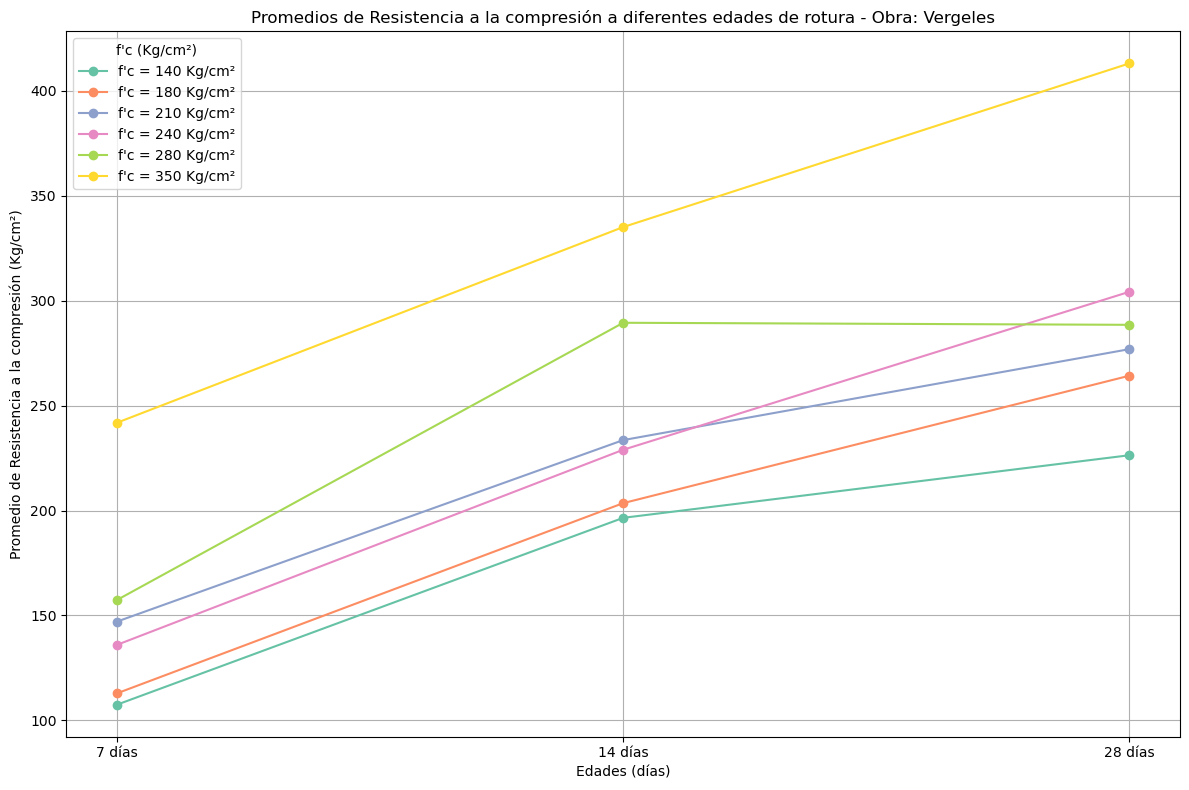

In [32]:
plot_lineas_por_obra(f_f, 'Vergeles')

## **Conclusiones**:
- Se realizó la comparación de las resistencias reales alcanzadas frente a las resistencias de diseño para verificar si se cumplen los requisitos de diseño.
- Se identificaron los proyectos que consistentemente no alcanzaron la resistencia de diseño, lo que puede indicar problemas en la mezcla, el curado o la ejecución.
- Se realizó un análisis de la variabilidad en las resistencias alcanzadas dentro de una misma obra para evaluar la consistencia del proceso de construcción.

## **Recomendaciones**:
- Aplicación de nuevos métodos para la limpieza de datos y su organización. 
- Generar funciones que permitan realizar análisis estadísticos más específicos para analizar la relación entre otras variables. 
- Representar los datos con graficos interactivos que se adapten a la forma más adecuada según la variable analizada.

### **Referencias Bibliográficas**:
- Kantasiri, T., Kasemsiri, P., Pongsa, U., Posi, P., & Chindaprasirt, P. (2024). Optimization of concrete containing waste crumb rubber mix design for thermal insulating applications using Taguchi method. Construction and Building Materials, 434. https://doi.org/10.1016/j.conbuildmat.2024.136636 
- Londoño, P. (23d. C., junio 22). Función Enumerate en Python: cómo funciona, cómo usarlo y ejemplo. HubSpot. https://blog.hubspot.es
- Waskom, M. (2012-2024). seaborn.color_palette. Seaborn. https://seaborn.pydata.org/generated/seaborn.color_palette.html
- Patiño, Oscar; et al. Control de Calidad del Concreto (Normas, pruebas y cartas de control). Laboratorio de Ensayo de Materiales, Centro Experimental de Ingeniería, Universidad Tecnológica de Panamá. RIDTEC . VOL. 4, Nº 1 y 2.